In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import style
style.use('ggplot')

In [3]:
x = np.array([10, 9, 2, 15, 10, 16, 11, 16], dtype=float)
y = np.array([95, 80, 10, 50, 45, 98, 38, 93], dtype=float)

In [4]:
assert(x.shape[0] == y.shape[0])

In [5]:
def plot_data(x, y):
    plt.scatter(x, y, s=10)
    plt.xlabel('Hours spent driving')
    plt.ylabel('Risk score')
    plt.plot()

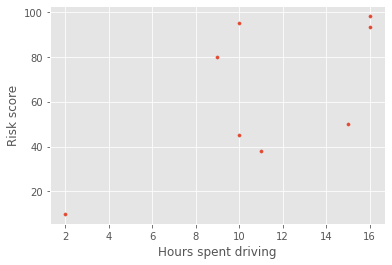

In [6]:
plot_data(x, y)

In [7]:
def h(x, theta):
    return np.matmul(x, theta)

In [8]:
def cost(x, y, theta):
    h_x = h(x, theta)
    delta = h_x - y
    return (delta.T @ delta ) / (1/2*y.shape[0])

In [9]:
mean = []
std = []

In [10]:
def normalize(x):
    u_mean = np.mean(x)
    u_std = np.std(x)
    x -= u_mean
    x /= u_std
    mean.append(u_mean)
    std.append(u_std)
    return x

In [11]:
x = normalize(x)
y = normalize(y)

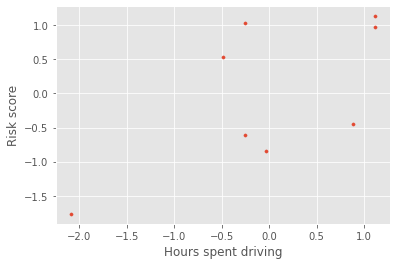

In [12]:
plot_data(x, y)

In [13]:
def train(x, y, theta, lr=0.01, epochs=100):
    J_all = []
    m = x.shape[0]
    
    for epoch in range(epochs):
        if epoch % 10 == 0:
            print('Epoch: ', str(epoch))
        h_x = h(x, theta)
        _cost = (1/m)*(x.T @ (h_x - y))
        theta -= (lr)*_cost
        J_all.append(cost(x, y, theta))
    return theta, np.array(J_all)

In [14]:
x.shape

(8,)

In [15]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [16]:
theta = np.zeros((x.shape[1], 1))

In [17]:
theta

array([[0.]])

In [18]:
theta.shape

(1, 1)

In [19]:
lr = 0.01
EPOCHS = 500

In [20]:
theta, J_all = train(x, y, theta, lr=lr, epochs=EPOCHS)

Epoch:  0
Epoch:  10
Epoch:  20
Epoch:  30
Epoch:  40
Epoch:  50
Epoch:  60
Epoch:  70
Epoch:  80
Epoch:  90
Epoch:  100
Epoch:  110
Epoch:  120
Epoch:  130
Epoch:  140
Epoch:  150
Epoch:  160
Epoch:  170
Epoch:  180
Epoch:  190
Epoch:  200
Epoch:  210
Epoch:  220
Epoch:  230
Epoch:  240
Epoch:  250
Epoch:  260
Epoch:  270
Epoch:  280
Epoch:  290
Epoch:  300
Epoch:  310
Epoch:  320
Epoch:  330
Epoch:  340
Epoch:  350
Epoch:  360
Epoch:  370
Epoch:  380
Epoch:  390
Epoch:  400
Epoch:  410
Epoch:  420
Epoch:  430
Epoch:  440
Epoch:  450
Epoch:  460
Epoch:  470
Epoch:  480
Epoch:  490


In [21]:
theta

array([[0.65678751]])

In [22]:
def plot_lr_line(x, y, theta):
    plt.scatter(x, y, s=10)
    plt.xlabel('Hours spent driving')
    plt.ylabel('Risk score')
    plt.plot(x, x*theta, linewidth=2)

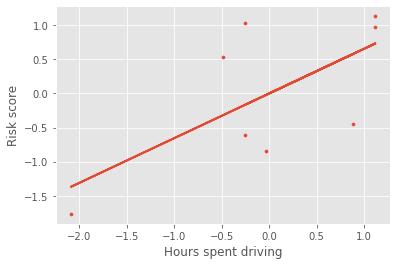

In [23]:
plot_lr_line(x, y, theta)

In [24]:
J_all[2].shape

(1, 1)

In [25]:
J_all[:1]

array([[[1.98260363]]])

In [26]:
def plot_cost(epochs, jplot):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, jplot, 'm', linewidth=2)

In [27]:
jplot = []
epochs = [i + 1 for i in range(EPOCHS)]
# print(J_all)

for j in J_all:
    jplot.append(j)

jplot = np.array(jplot, dtype=float).reshape(-1, 1)
epochs = np.array(epochs, dtype=float).reshape(-1, 1)

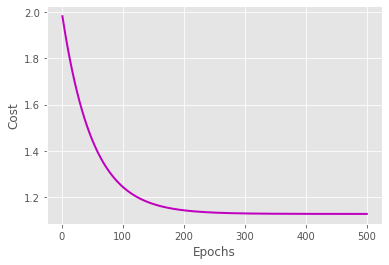

In [28]:
plot_cost(epochs, jplot)